# **Instagram Posts Analysis**

# 1. ***Exploratory Data Analysis***

## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Importing .csv file

In [6]:
df = pd.read_csv("Dataframes/igposts.csv")

In [7]:
df.shape

(653, 6)

In [8]:
df.head()

,username,likes,comments,text,hashtags,date
0,editorasextante,182,5,PRÉ-VENDA! ✨\n\nCom mais de 2 milhões de exemp...,"['aceitação', 'autoestima', 'autossabotagem', ...",2024-04-25 14:54:33
1,editorasextante,420,15,Pré-venda disponível! 📢\n\nSophie Deram (@soph...,"['sophiederam', 'saúde', 'alimentação', 'pared...",2024-04-20 12:00:25
2,editorasextante,600,10,LANÇAMENTOS DE ABRIL 📢\n\nEste mês está replet...,[],2024-04-04 20:20:07
3,editorasextante,123,0,O livro “Meditações” oferece insights e orient...,"['meditações', 'marcoaurélio', 'filosofia', 'r...",2024-04-26 15:49:50
4,editorasextante,1396,7,"🎶 Se você não consegue parar de ouvir ""The Tor...","['aturnedocoraçãopartido', 'thebreakuptour', '...",2024-04-24 15:15:17


## Checking the dataframe

In [10]:
print('Dataframe format = {}'.format(df.shape))
print('Memory usage = {:.2f} MB'.format(df.memory_usage().sum() / 1024**2))

Dataframe format = (653, 6)
Memory usage = 0.03 MB


## Descriptive statistics

In [12]:
df.describe()

,likes,comments
count,653.000000,653.000000
mean,2837.298622,146.379786
std,4880.940098,1016.664172
min,-1.000000,0.000000
25%,512.000000,10.000000
50%,1151.000000,26.000000
75%,2813.000000,72.000000
max,44251.000000,20844.000000


## Checking missing values

In [14]:
df.isnull().sum()

username    0
likes       0
comments    0
text        1
hashtags    0
date        0
dtype: int64

### Checking missing text

missing text can occur on reel posts

In [16]:
df[df.isna().any(axis=1)]

,username,likes,comments,text,hashtags,date
60,galerarecord,2927,67,NaN,[],2024-04-11 20:55:05


### Posts with missing hashtags

On scraping, the conversion to a .csv file returned hashtags from reels and reposts not as missing values, but as an empty list '[]' for each value.

In [18]:
df.loc[df['hashtags'] == '[]'].shape

(162, 6)

## Total posts by profile

In [20]:
df['username'].value_counts()

username
companhiadasletras     134
darksidebooks           88
editorarocco            84
intrinseca              81
editoraarqueiro         72
galerarecord            65
plataforma21_           36
editoraparalela         35
editorasextante         29
editoraeuphoria         23
harpercollinsbrasil      2
editoraelefante          1
veruseditora             1
editoraaleph             1
editorasuma              1
Name: count, dtype: int64

### Top 5 most liked posts

In [22]:
top_5_likes = df.sort_values(by='likes', ascending=False)
top_5_likes.head(5)

,username,likes,comments,text,hashtags,date
28,editorasextante,44251,582,Procrastinação não é um problema de gerenciame...,[],2024-03-27 23:05:31
314,editorarocco,40888,173,"É raro, mas acontece!",[],2024-04-02 22:01:33
629,darksidebooks,36814,1565,“Literalmente acabei de vomitar no cinema assi...,[],2024-04-09 14:14:44
50,galerarecord,29677,489,"OLHA QUEM CHEGOU, GALERA! \n\nAgora em uma edi...","['ÉAssimQueComeça', 'ÉAssimQueAcaba', 'Colleen...",2024-04-16 20:01:32
405,editoraarqueiro,29067,107,As mãos... Os olhares... 🤌💗\n\n🐝 Prepare-se pa...,"['repost', 'bridgertonnetflix', 'bridgerton', ...",2024-04-06 16:48:51


### Total likes by profile

In [24]:
df.groupby('username')['likes'].sum().reset_index().sort_values(by='likes', ascending=False)

,username,likes
1,darksidebooks,450043
12,intrinseca,305862
10,galerarecord,295512
3,editoraarqueiro,230652
0,companhiadasletras,202009
7,editorarocco,199233
8,editorasextante,96337
5,editoraeuphoria,39158
6,editoraparalela,21713
13,plataforma21_,7248


### Total comments by profile

In [26]:
df.groupby('username')['comments'].sum().reset_index().sort_values(by='comments', ascending=False)

,username,comments
7,editorarocco,26969
10,galerarecord,26180
12,intrinseca,13634
1,darksidebooks,13311
3,editoraarqueiro,7186
0,companhiadasletras,3320
5,editoraeuphoria,1708
13,plataforma21_,1220
8,editorasextante,928
6,editoraparalela,808


## Feature Engineering

## Converting 'date' column into datetime format

In [29]:
df['date'] = pd.to_datetime(df['date'])

## Creating new column with the posting time

In [31]:
df['time'] = df['date'].dt.time

## Creating new column with the day of week

In [33]:
df['day_of_week'] = df['date'].dt.dayofweek

## Converting numbers to names

In [35]:
df['day_of_week'] = df['day_of_week'].astype('str')
df['day_of_week'].replace({'0': 'Monday', '1': 'Tuesday', '2': 'Wednesday', '3': 'Thursday', '4': 'Friday', '5' : 'Saturday', '6': 'Sunday'}, inplace=True)

## Creating new column with just the hour

In [37]:
df['hour'] = df['date'].dt.hour

## Removing the time from the 'date' column

In [39]:
df['date'] = df['date'].dt.date

In [40]:
df.head()

,username,likes,comments,text,hashtags,date,time,day_of_week,hour
0,editorasextante,182,5,PRÉ-VENDA! ✨\n\nCom mais de 2 milhões de exemp...,"['aceitação', 'autoestima', 'autossabotagem', ...",2024-04-25,14:54:33,Thursday,14
1,editorasextante,420,15,Pré-venda disponível! 📢\n\nSophie Deram (@soph...,"['sophiederam', 'saúde', 'alimentação', 'pared...",2024-04-20,12:00:25,Saturday,12
2,editorasextante,600,10,LANÇAMENTOS DE ABRIL 📢\n\nEste mês está replet...,[],2024-04-04,20:20:07,Thursday,20
3,editorasextante,123,0,O livro “Meditações” oferece insights e orient...,"['meditações', 'marcoaurélio', 'filosofia', 'r...",2024-04-26,15:49:50,Friday,15
4,editorasextante,1396,7,"🎶 Se você não consegue parar de ouvir ""The Tor...","['aturnedocoraçãopartido', 'thebreakuptour', '...",2024-04-24,15:15:17,Wednesday,15


## Removing the 'time' column

In [42]:
df.drop('time', axis=1, inplace=True)

## Adding columns with the word and hashtag counts

In [44]:
df['text'] = df['text'].astype('str')

In [45]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [46]:
df['hashtag_count'] = df['hashtags'].apply(lambda x: len(x.split()))

## Analysing the data with the new features

### Hours with more posts

In [49]:
df.groupby('hour').size().sort_values(ascending=False)

hour
21    88
12    85
13    63
18    58
20    57
17    55
11    44
15    40
14    37
22    34
19    31
16    29
23    22
1      4
0      3
3      2
2      1
dtype: int64

### Days of week with more posts

In [51]:
df.groupby('day_of_week').size().sort_values(ascending=False)

day_of_week
Thursday     113
Wednesday    108
Tuesday      104
Friday       100
Monday        85
Saturday      73
Sunday        70
dtype: int64

## Average of likes by day of week

In [53]:
df.groupby('day_of_week')['likes'].mean().sort_values(ascending=False)

day_of_week
Tuesday      3557.163462
Saturday     3197.945205
Wednesday    3178.250000
Friday       2911.910000
Monday       2481.917647
Sunday       2477.257143
Thursday     2040.247788
Name: likes, dtype: float64

### Average of likes by posting hour

In [55]:
df.groupby('hour')['likes'].mean().sort_values(ascending=False).round()

hour
3     11109.0
14     4295.0
0      4070.0
20     3555.0
22     3319.0
13     3212.0
16     3093.0
23     3009.0
19     3005.0
15     2918.0
11     2525.0
21     2414.0
18     2335.0
12     2228.0
17     2223.0
1      1116.0
2       703.0
Name: likes, dtype: float64

### Most posts by date

In [57]:
df.groupby('date').size().sort_values(ascending=False)

date
2024-04-11    30
2024-04-24    27
2024-04-16    27
2024-04-02    26
2024-04-25    25
2024-04-10    25
2024-04-18    24
2024-04-12    23
2024-04-05    22
2024-04-19    22
2024-04-17    22
2024-04-22    22
2024-04-23    22
2024-04-04    22
2024-04-03    21
2024-04-09    21
2024-04-15    20
2024-04-26    20
2024-04-13    19
2024-04-06    19
2024-04-08    18
2024-04-07    18
2024-04-20    18
2024-04-21    18
2024-04-14    18
2024-04-01    16
2024-03-29    13
2024-03-28    12
2024-03-30    11
2024-03-31    10
2024-04-29     9
2024-03-27     9
2024-04-30     8
2024-04-28     6
2024-04-27     6
2024-05-01     4
dtype: int64

### Comments by day of week

In [59]:
df.groupby('day_of_week')['comments'].sum().sort_values(ascending=False)

day_of_week
Wednesday    32545
Friday       31423
Tuesday       9610
Thursday      8186
Saturday      6166
Monday        4610
Sunday        3046
Name: comments, dtype: int64

### Average of comments by posting hour

In [61]:
df.groupby('hour')['comments'].mean().sort_values(ascending=False).round()

hour
19    719.0
22    572.0
18    219.0
3     214.0
15    126.0
17    112.0
14    108.0
20     86.0
13     68.0
12     66.0
21     63.0
0      62.0
11     57.0
16     53.0
23     39.0
1      15.0
2       7.0
Name: comments, dtype: float64

# 2. ***Natural Language Processing***

## Importing Libraries

In [64]:
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import collections

from wordcloud import WordCloud

## Pre-Processing

### Removing formatting error '\n\n' 

In [67]:
df['text'].replace({'\n\n': ' '}, regex=True, inplace=True)

### Convertind text to lowercase

In [69]:
df['text'] = df['text'].str.lower()

In [70]:
df['hashtags'] = df['hashtags'].str.lower()

### Changing '[]' to missing value

In [72]:
df['hashtags'] = df['hashtags'].replace({'[]': np.nan})

In [73]:
df['hashtags'].isnull().sum()

162

In [74]:
df.shape

(653, 10)

### Removing missing values

In [76]:
df.dropna(inplace=True)

### Removing hashtags from the posts' text

In [78]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in str(x).split() if not word.startswith('#')]))

### Changing settings to display the entire post

In [80]:
pd.set_option('display.max_colwidth', None)

### Function to remove special characters

In [82]:
def remove_special_characters(text):
    # Function to remove accents and punctuation from a string
    def remove(text):
        # Remove accents
        text = re.sub(r'[àáâãäå]', 'a', text)
        text = re.sub(r'[èéêë]', 'e', text)
        text = re.sub(r'[ìíîï]', 'i', text)
        text = re.sub(r'[òóôõö]', 'o', text)
        text = re.sub(r'[ùúûü]', 'u', text)
        text = re.sub(r'[ÀÁÂÃÄÅ]', 'A', text)
        text = re.sub(r'[ÈÉÊË]', 'E', text)
        text = re.sub(r'[ÌÍÎÏ]', 'I', text)
        text = re.sub(r'[ÒÓÔÕÖ]', 'O', text)
        text = re.sub(r'[ÙÚÛÜ]', 'U', text)
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        return text

    # Apply the function to remove accents and punctuation
    text = remove(text)
    
    # Regular expression to find special characters, except accented letters
    pattern = r'[^a-zA-ZÀ-ÖØ-öø-ÿ\s]' 
    # Replace special characters with whitespace
    text = re.sub(pattern, ' ', text)
    
    return text

def remove_special_characters_df(df, col):
    df[col] = df[col].apply(remove_special_characters)

In [83]:
remove_special_characters_df(df, 'hashtags')

### Checking the dataframe

In [85]:
df.head()

,username,likes,comments,text,hashtags,date,day_of_week,hour,word_count,hashtag_count
0,editorasextante,182,5,"pré-venda! ✨ com mais de 2 milhões de exemplares vendidos do seu best-seller “acolhendo sua criança interior”, stefanie stahl mergulha fundo no significado da autoestima, explorando suas raízes e os caminhos para cultivar o amor-próprio genuíno em seu novo livro. “como fortalecer sua autoestima” é um convite para curar feridas antigas e construir uma autoestima sólida, com reflexões profundas e exercícios práticos. 💖 pré-venda já disponível no link da bio @editorasextante",aceitaçao autoestima autossabotagem crençaslimitantes empoderamento amorproprio,2024-04-25,Thursday,14,77,6
1,editorasextante,420,15,"pré-venda disponível! 📢 sophie deram (@sophiederam.br) está prestes a derrubar os mitos e revelar as descobertas mais recentes sobre nutrição, saúde e longevidade! 📒 no seu novo livro ""pare de engolir mitos"", ela desmistifica os mitos mais comuns sobre alimentação e te ensina a tomar decisões conscientes sobre o que você come, com base em evidências científicas. chega de dietas restritivas e culpa! aprenda a comer de forma prazerosa e saudável com sophie deram. 👉 garanta o seu exemplar na pré-venda pelo link da bio do @editorasextante!",sophiederam saude alimentaçao paredeengolirmitos opesodasdietas mitos compulsaoalimentar restriçaoalimentar,2024-04-20,Saturday,12,95,8
3,editorasextante,123,0,"o livro “meditações” oferece insights e orientações práticas sobre vários aspectos da vida, desde como lidar com as adversidades até a melhor forma de interagir com os outros. 📖 nesta versão, originalmente traduzida do grego para o inglês por gregory hays - a primeira em décadas -, os pensamentos de marco aurélio falam com o novo imediatismo: nunca antes suas percepções foram apresentadas de forma tão direta e impactante. • disponível nos formatos de livro físico, ebook e audiolivro. 📱",meditaçoes marcoaurelio filosofia reflexoes insight,2024-04-26,Friday,15,85,5
4,editorasextante,1396,7,"🎶 se você não consegue parar de ouvir ""the tortured poets department"", vai adorar mergulhar nestes dois livros inspirados na vida e arte dessa talentosa artista. 📖 taylor swift, de wendy loggia. neste livro ilustrado, você vai conhecer a trajetória da menina que ousou seguir seus sonhos e se tornou uma das maiores estrelas da música pop. 📖 a turnê do coração partido, de austin siegemund-broka e emily wibberley. riley wynn virou uma superestrela da noite para o dia graças ao seu álbum com músicas de término e um single inesquecível. quando seu ex-marido declara que a música de maior sucesso é sobre ele, riley entra em contato com max harcourt, seu namorado da faculdade e a verdadeira inspiração para a canção do momento. riley quer revelar ao público que max é o verdadeiro muso. ele aceita, mas com uma condição: fazer parte da banda na turnê da cantora.",aturnedocoraçaopartido thebreakuptour austinsiegemundbroka emilywibberley romcombooks romcom wendyloggia livroilustrado biografiailustrada comediaromantica taylorswift midnights evermore folklore love reputation red speaknow fearless debut thetorturedpoetsdepartment,2024-04-24,Wednesday,15,170,21
5,editorasextante,1362,10,"todos nós temos uma verdadeira indústria química dentro do cérebro, capaz de produzir substâncias específicas para gerar a sensação que desejamos. 🧠 📖 em “seis substâncias para viver bem” você vai aprender a ativar esses hormônios de maneira natural, alcançando o bem-estar físico e mental que deseja. 💡 aprenda técnicas poderosas para se tornar a melhor versão de si mesmo.",hormonios saude saudemental comportamentos dopamina davidjpphillips,2024-04-24,Wednesday,13,66,6


## Saving into a .csv file
It will be used in the streamlit data app

In [87]:
df.to_csv("igposts_treated.csv", index=False)

## Most Used Hashtags

In [89]:
hashtags = ' '.join(df['hashtags']).split()

In [90]:
counter_hashtags = collections.Counter(hashtags)

In [91]:
top_50_hashtags = counter_hashtags.most_common(50)

In [92]:
dict_hashtags = dict(top_50_hashtags)

## Creating a dataframe with every hashtag and the amout of likes they received

In [94]:
counter = collections.Counter()

In [95]:
# Inicialize um contador para contar a frequência das palavras nas hashtags
counter = collections.Counter()

# Iterar sobre as hashtags no DataFrame e contar a frequência das palavras
for hashtags, likes in zip(df['hashtags'], df['likes']):
    words = hashtags.split()  # Divide as hashtags em palavras
    counter.update(words)     # Atualiza o contador com as palavras e suas frequências

# Criar um dicionário onde as chaves são as palavras e os valores são os likes associados a essas palavras
word_likes = {}
for hashtags, likes in zip(df['hashtags'], df['likes']):
    words = hashtags.split()
    for word in words:
        if word in word_likes:
            word_likes[word] += likes
        else:
            word_likes[word] = likes

In [96]:
df_hashtag_likes = pd.DataFrame(list(word_likes.items()), columns=['hashtag', 'likes'])

In [97]:
df_hashtags_likes = df_hashtag_likes.sort_values(by='likes', ascending=False)

In [98]:
df_hashtags_likes.head(10)

,hashtag,likes
48,livros,199511
55,bookstagram,160783
225,sarahjmaas,121261
224,cortedeespinhoserosas,120063
115,fantasias,117753
138,livrosderomance,114529
131,literatura,113400
231,rhysand,108498
119,livrosdefantasia,106580
68,repost,101239


## Creating a .csv file
Again, this one will also be used in the streamlit data app

In [100]:
df_hashtags_likes.to_csv("hashtags_likes.csv", index=False)

# 3. ***Data Visualization***

## Wordcloud of the most used hashtags

In [103]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict_hashtags)

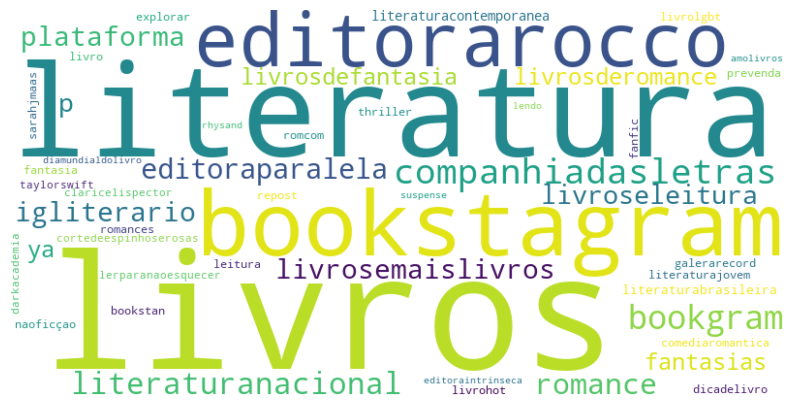

In [104]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Wordcloud of the most liked Hashtags

In [106]:
dict_top_hashtags_likes = dict(zip(df_hashtags_likes['hashtag'], df_hashtags_likes['likes']))

In [107]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict_top_hashtags_likes)

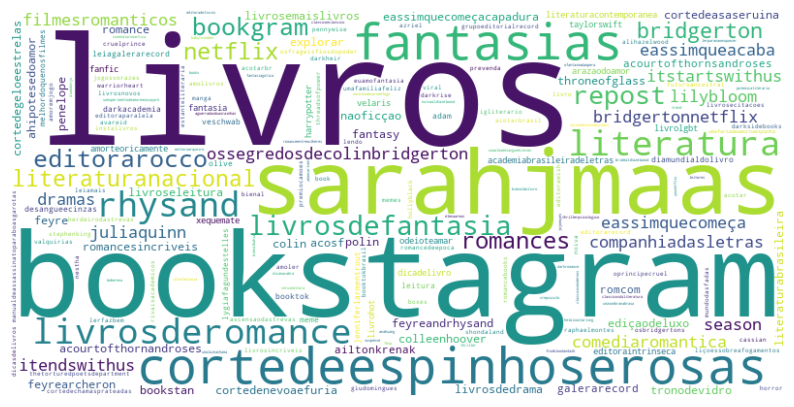

In [108]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()